In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from pprint import pprint
from api_keys import g_key
file2019 = "2019.csv"
file2020 = "2020.csv"

crime_data2019 = pd.read_csv(file2019,low_memory=False)
crime_data2020 = pd.read_csv(file2020,low_memory=False)



In [2]:
assault2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("ASSAULT")]
# print(len(assault2019))
aslt2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("ASLT")]
# print(len(aslt2019))
allassaultstypes2019 = pd.merge(assault2019,aslt2019, how="outer")
print(f"all assaults 2019: {len(allassaultstypes2019)}")
familyassaults2019 = allassaultstypes2019.loc[allassaultstypes2019["Family Violence"]=="Y"]

print(f"family related assaults 2019: {len(familyassaults2019)}")

assault2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("ASSAULT")]
# print(len(assault2020))
aslt2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("ASLT")]
# print(len(aslt2020))
allassaultstypes2020 = pd.merge(assault2020,aslt2020, how="outer")
print(f"all assaults 2020: {len(allassaultstypes2020)}")

familyassaults2020 = allassaultstypes2020.loc[allassaultstypes2020["Family Violence"]=="Y"]

print(f"family related 2020: {len(familyassaults2020)}")
# print(crime_data2019["Zip Code"].astype("int64"))

all assaults 2019: 6705
family related assaults 2019: 2906
all assaults 2020: 6593
family related 2020: 2904


In [3]:
rape2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("RAPE")]
print(len(rape2019))
familyrape2019 = rape2019.loc[rape2019["Family Violence"]=="Y"]
print(f"family related rape 2019: {len(familyrape2019)}")
rape2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("RAPE")]
print(len(rape2020))
familyrape2020 = rape2020.loc[rape2020["Family Violence"]=="Y"]
print(f"family related rape 2020: {len(familyrape2020)}")

168
family related rape 2019: 56
144
family related rape 2020: 55


In [4]:
theft2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("THEFT")]
print(f"theft 2019: {len(theft2019)}")
familytheft2019 = theft2019.loc[theft2019["Family Violence"]=="Y"]
print(f"family related theft 2019: {len(familytheft2019)}")

theft2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("THEFT")]
print(f"theft 2020: {len(theft2020)}")
familytheft2020 = theft2020.loc[theft2020["Family Violence"]=="Y"]
print(f"family related theft 2020: {len(familytheft2020)}")


theft 2019: 10408
family related theft 2019: 25
theft 2020: 9712
family related theft 2020: 36


In [5]:
dwi2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("DWI")]
print(f"dwi 2019: {len(dwi2019)}")

dwi2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("DWI")]
print(f"dwi 2020: {len(dwi2020)}")



dwi 2019: 1742
dwi 2020: 1255


In [6]:
murder2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("MURDER")]
print(f"murder 2019: {len(murder2019)}")

murder2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("MURDER")]
print(f"murder 2020: {len(murder2020)}")



murder 2019: 15
murder 2020: 20


In [7]:
manslaughter2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("MANSLAUGHTER")]
print(f"manslaughter 2019: {len(manslaughter2019)}")

manslaughter2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("MANSLAUGHTER")]
print(f"manslaughter 2020: {len(manslaughter2020)}")



manslaughter 2019: 2
manslaughter 2020: 3


In [8]:
childsexabuse2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("SEX ABUSE")]
print(f"childsexabuse 2019: {len(childsexabuse2019)}")

childsexabuse2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("SEX ABUSE")]
print(f"childsexabuse 2020: {len(childsexabuse2020)}")



childsexabuse 2019: 5
childsexabuse 2020: 2


In [9]:
prostitution2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("PROSTITUTION")]
print(f"prostitution 2019: {len(prostitution2019)}")

prostitution2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("PROSTITUTION")]
print(f"prostitution 2020: {len(prostitution2020)}")



prostitution 2019: 35
prostitution 2020: 45


35
45


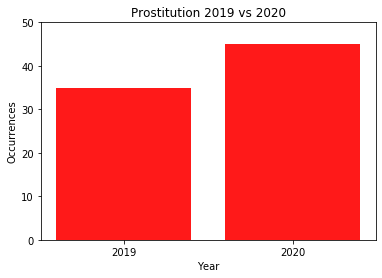

In [46]:
prostitution_count2019 = prostitution2019["Address"].count()
print(prostitution_count2019)
prostitution_count2020 = prostitution2020["Address"].count()
print(prostitution_count2020)
counts =[prostitution_count2019,prostitution_count2020]
x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, color='r', alpha=0.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,50)
plt.title("Prostitution 2019 vs 2020")
plt.xlabel("Year")
plt.ylabel("Occurrences")
plt.show()

In [10]:
drugrelated2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("DRUG")]
print(f"drugrelated 2019: {len(drugrelated2019)}")

drugrelated2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("DRUG")]
print(f"drugrelated 2020: {len(drugrelated2020)}")



drugrelated 2019: 552
drugrelated 2020: 599


In [11]:
graffiti2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("GRAFFITI")]
print(f"graffiti 2019: {len(graffiti2019)}")

graffiti2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("GRAFFITI")]
print(f"graffiti 2020: {len(graffiti2020)}")



graffiti 2019: 136
graffiti 2020: 140


136
140


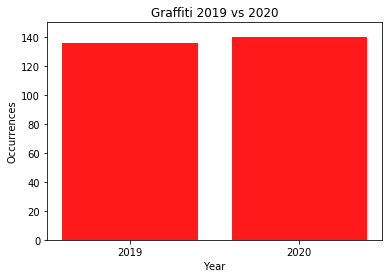

In [50]:
graffiti2019_count = graffiti2019["Address"].count()
print(graffiti2019_count)
graffiti2020_count = graffiti2020["Address"].count()
print(graffiti2020_count)
counts =[graffiti2019_count,graffiti2020_count]
x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, color='r', alpha=0.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,150)
plt.title("Graffiti 2019 vs 2020")
plt.xlabel("Year")
plt.ylabel("Occurrences")
plt.show()

In [12]:
burglary2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("BURGLARY")]
print(f"burglary 2019: {len(burglary2019)}")

burglary2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("BURGLARY")]
print(f"burglary 2020: {len(burglary2020)}")

burglary 2019: 7807
burglary 2020: 7176


In [13]:
#Graffiti 2019
gmaps.configure(api_key=g_key)

firstloclat2019 = []
firstloclng2019 = []

graffiti2019 = graffiti2019.copy()
graffiti2019["Address"] = graffiti2019["Address"].apply(lambda row: row.replace(" ", "+") + "+AUSTIN+TX")
print(len(graffiti2019))
for i,graffiti in (graffiti2019.iterrows()):

    try:
        
        address = graffiti2019["Address"][i] 
        gurl = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}"
        response = requests.get(gurl)    
        austin_data = response.json()
        firstloclat2019.append(austin_data["results"][0]["geometry"]["location"]["lat"])
        firstloclng2019.append(austin_data["results"][0]["geometry"]["location"]["lng"])        
        
        
    except IndexError:
        firstloclat2019.append("No data.")
        firstloclng2019.append("No data.")




136


In [14]:
#Graffiti 2020
gmaps.configure(api_key=g_key)

firstloclat2020 = []
firstloclng2020 = []

graffiti2020 = graffiti2020.copy()
graffiti2020["Address"] = graffiti2020["Address"].apply(lambda row: row.replace(" ", "+") + "+AUSTIN+TX")
print(len(graffiti2020))
for i,graffiti in (graffiti2020.iterrows()):

    try:
        
        address = graffiti2020["Address"][i] 
        gurl = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}"
        response = requests.get(gurl)    
        austin_data2020 = response.json()
        firstloclat2020.append(austin_data2020["results"][0]["geometry"]["location"]["lat"])
        firstloclng2020.append(austin_data2020["results"][0]["geometry"]["location"]["lng"])        
        
        
    except IndexError:
        firstloclat2020.append("No data.")
        firstloclng2020.append("No data.")




140


In [15]:
#Graffiti 2019 + 2020 Zone Map

austinlatlong = ()
austinlatlong = (30.2672, -97.7431)
latlong_df2019 = pd.DataFrame({"Lat": firstloclat2019
                              ,"Lng": firstloclng2019})        
latlong_df2020 = pd.DataFrame({"Lat": firstloclat2020
                              ,"Lng": firstloclng2020})

info_box_content2019 = """
<dl>
<dt>Graffiti Zone 2019</dt>
<dt>Latitude</dt><dd>{Lat}</dd>
<dt>Longitude</dt><dd>{Lng}</dd>
</dl>
"""
info_box_content2020 = """
<dl>
<dt>Graffiti Zone 2020</dt>
<dt>Latitude</dt><dd>{Lat}</dd>
<dt>Longitude</dt><dd>{Lng}</dd>
</dl>
"""


# print(latlong_df)
latlong_df2019 = latlong_df2019.round(2)
latlong_df2019 = latlong_df2019.drop_duplicates()

latlong_df2020 = latlong_df2020.round(2)
latlong_df2020 = latlong_df2020.drop_duplicates()
# print(len(latlong_df2019))

graffiti_info2019 = [info_box_content2019.format(**row) for index, row in latlong_df2019.iterrows()]
graffiti_info2020 = [info_box_content2020.format(**row) for index, row in latlong_df2020.iterrows()]






In [16]:
print(len(latlong_df2019))
fig2019 = gmaps.figure(center=austinlatlong,zoom_level = 11 ,map_type="ROADMAP")
marker_layer = gmaps.marker_layer(latlong_df2019,info_box_content=graffiti_info2019)
fig2019.add_layer(marker_layer)
fig2019


79


Figure(layout=FigureLayout(height='420px'))

In [17]:
print(len(latlong_df2020))
fig2020 = gmaps.figure(center=austinlatlong,zoom_level = 11 ,map_type="ROADMAP")
marker_layer2020 = gmaps.marker_layer(latlong_df2020,info_box_content=graffiti_info2020)
fig2020.add_layer(marker_layer)
fig2020

88


Figure(layout=FigureLayout(height='420px'))

In [18]:
#Prostitution 2019
gmaps.configure(api_key=g_key)

firstloclat2019_prostitution = []
firstloclng2019_prostitution = []

prostitution2019 = prostitution2019.copy()
prostitution2019["Address"] = prostitution2019["Address"].apply(lambda row: row.replace(" ", "+") + "+AUSTIN+TX")
print(len(prostitution2019))
for i,graffiti in (prostitution2019.iterrows()):

    try:
        
        address = prostitution2019["Address"][i] 
        gurl = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}"
        response = requests.get(gurl)    
        austin_data_prostitution_2019 = response.json()
        firstloclat2019_prostitution.append(austin_data_prostitution_2019["results"][0]["geometry"]["location"]["lat"])
        firstloclng2019_prostitution.append(austin_data_prostitution_2019["results"][0]["geometry"]["location"]["lng"])        
        
        
    except IndexError:
        firstloclat2019_prostitution.append("No data.")
        firstloclng2019_prostitution.append("No data.")




35


In [19]:
#Prostitution 2020
gmaps.configure(api_key=g_key)

firstloclat2020_prostitution = []
firstloclng2020_prostitution = []

prostitution2020 = prostitution2020.copy()
prostitution2020["Address"] = prostitution2020["Address"].apply(lambda row: row.replace(" ", "+") + "+AUSTIN+TX")
print(len(prostitution2020))
for i,graffiti in (prostitution2020.iterrows()):

    try:
        
        address = prostitution2020["Address"][i] 
        gurl = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}"
        response = requests.get(gurl)    
        austin_data_prostitution_2020 = response.json()
        firstloclat2020_prostitution.append(austin_data_prostitution_2020["results"][0]["geometry"]["location"]["lat"])
        firstloclng2020_prostitution.append(austin_data_prostitution_2020["results"][0]["geometry"]["location"]["lng"])        
        
        
    except IndexError:
        firstloclat2020_prostitution.append("No data.")
        firstloclng2020_prostitution.append("No data.")




45


In [20]:
#Prostitution 2019 + 2020 Zone Map

austinlatlong = ()
austinlatlong = (30.2672, -97.7431)
latlong_df2019_prostitution = pd.DataFrame({"Lat": firstloclat2019_prostitution
                                           ,"Lng": firstloclng2019_prostitution})        
latlong_df2020_prostitution = pd.DataFrame({"Lat": firstloclat2020_prostitution
                                           ,"Lng": firstloclng2020_prostitution})

info_box_content2019 = """
<dl>
<dt>Prostitution Zone 2019</dt>
<dt>Latitude</dt><dd>{Lat}</dd>
<dt>Longitude</dt><dd>{Lng}</dd>
</dl>
"""
info_box_content2020 = """
<dl>
<dt>Prostitution Zone 2020</dt>
<dt>Latitude</dt><dd>{Lat}</dd>
<dt>Longitude</dt><dd>{Lng}</dd>
</dl>
"""


# print(latlong_df)
latlong_df2019_prostitution = latlong_df2019_prostitution.round(5)
latlong_df2019_prostitution = latlong_df2019_prostitution.drop_duplicates()

latlong_df2020_prostitution = latlong_df2020_prostitution.round(5)
latlong_df2020_prostitution = latlong_df2020_prostitution.drop_duplicates()
# print(len(latlong_df2019))

prostitution_info2019 = [info_box_content2019.format(**row) for index, row in latlong_df2019_prostitution.iterrows()]
prostitution_info2020 = [info_box_content2020.format(**row) for index, row in latlong_df2020_prostitution.iterrows()]






In [21]:
print(len(latlong_df2019_prostitution))
fig2019_pro = gmaps.figure(center=austinlatlong,zoom_level = 11 ,map_type="ROADMAP")
marker_layer = gmaps.marker_layer(latlong_df2019_prostitution,info_box_content=prostitution_info2019)
fig2019_pro.add_layer(marker_layer)
fig2019_pro


31


Figure(layout=FigureLayout(height='420px'))

In [22]:
print(len(latlong_df2020_prostitution))
fig2020_pro = gmaps.figure(center=austinlatlong,zoom_level = 11 ,map_type="ROADMAP")
marker_layer = gmaps.marker_layer(latlong_df2020_prostitution,info_box_content=prostitution_info2020)
fig2020_pro.add_layer(marker_layer)
fig2020_pro


27


Figure(layout=FigureLayout(height='420px'))